In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [231]:

filename = 'SPECTF.train.csv'

names = np.arange(45)
raw_data = open(filename, 'rt')
data = np.loadtxt(raw_data, delimiter=",")
df = pd.DataFrame(data, columns=names )







In [232]:
correlation = df.corr('pearson')


In [233]:
abs(correlation[0].sort_values())

40    0.526152
30    0.488084
26    0.410055
42    0.394695
24    0.381477
25    0.378735
28    0.378530
43    0.378077
39    0.375311
4     0.357876
41    0.353954
22    0.332094
44    0.327979
32    0.323664
29    0.323575
16    0.291540
14    0.290655
3     0.264282
6     0.256404
20    0.246964
23    0.246207
8     0.244278
10    0.230602
31    0.221958
36    0.211905
15    0.190110
38    0.182488
33    0.178427
18    0.174335
12    0.156661
2     0.153489
34    0.150225
27    0.146302
13    0.134440
19    0.114378
21    0.096580
11    0.090127
35    0.081470
17    0.074458
7     0.043057
5     0.032195
37    0.017983
9     0.001694
1     0.134916
0     1.000000
Name: 0, dtype: float64

In [253]:
x = df[40]
y = df[0]  


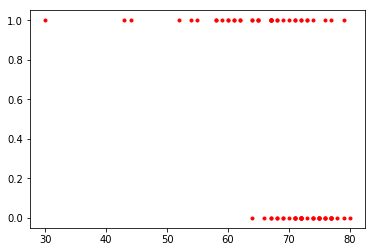

In [254]:
plt.plot(x,y,'r.')  #data visualisation

In [255]:
x = np.array(x)
y = np.array(y)

In [256]:
x = (x - x.min())/(x.max() - x.min())

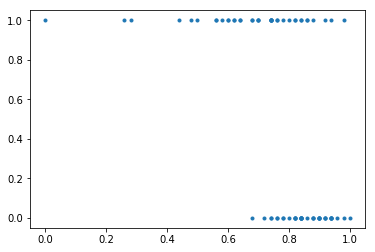

In [257]:
plt.plot(x,y,'.')

In [258]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [259]:
def hypothesis(a,x,b):
    return(1/(1 + np.exp(-(a*x+b))))

In [260]:
def error(a,x,b,y):
    e = 0
    m = len(x)
    for i in range(m):
        e += -(y[i]*np.log(hypothesis(a,x[i],b))) - ((1 - y[i])*np.log(1-hypothesis(a,x[i],b)))
    return (1/m)*e

In [261]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    
    for i in range(m):
        grad_a += (hypothesis(a,x[i],b) - y[i])*x[i]
        grad_b+= (hypothesis(a,x[i],b) - y[i])
        
        
    a = a- (grad_a * learning_rate)
    b = b-(grad_b * learning_rate)
    
    return a,b

In [262]:
def descend(int_a,x,init_b,y,learning_rate,iterations):
    a = init_a
    b = init_b
    
    
    for i in range(iterations):
        e = error(a,x,b,y)
        if i%1000==0:
            print(f"error{e},a:{a},b:{b}")
                  
        a,b = step_gradient(a,x,b,y,learning_rate)
                  
    return a,b

In [281]:
init_a =-11.49654633694423
init_b = 9.051680312464232
iterations = 10000
learning_rate = 0.001

In [282]:
final_a,final_b = descend(init_a,x_train,init_b,y_train,learning_rate,iterations)

error0.5078221143021957,a:-11.49654633694423,b:9.051680312464232
error0.5078219677217509,a:-11.498846670822303,b:9.053551554670284
error0.5078218355836777,a:-11.501030740410226,b:9.055328223960244
error0.5078217164616742,a:-11.503104450925186,b:9.057015123417013
error0.5078216090707742,a:-11.505073404798328,b:9.058616809887159
error0.5078215122532739,a:-11.506942917480613,b:9.060137606832031
error0.50782142496607,a:-11.508718032396215,b:9.061581616485064
error0.5078213462692631,a:-11.510403535092141,b:9.062952731355864
error0.507821275315906,a:-11.512003966629218,b:9.064254645117854
error0.5078212113427713,a:-11.51352363625766,b:9.065490862914496


In [283]:
error(final_a,x_train,final_b,y_train)

0.5078211536620467

In [284]:
error(final_a,x_test,final_b,y_test)

0.43710826445423906

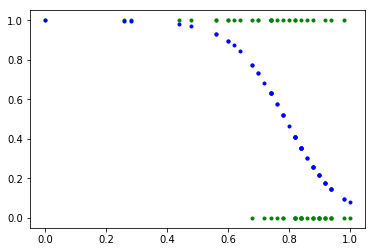

In [285]:
plt.plot(x_train,y_train,'g.',
        x_train, hypothesis(final_a,x_train,final_b),'b.')

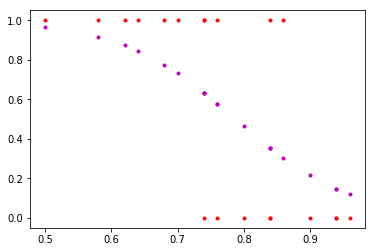

In [286]:
plt.plot(x_test,y_test,"r.",
        x_test,hypothesis(final_a,x_test,final_b),'m.')

In [287]:
def accuracy(a,x,b,y):
    correct = 0
    m = len(x)
    
    for i in range(m):
        pred = hypothesis(a,x[i],b)
        
        if pred >0.5:
            z=1
        else:
            z=0
            
        if y[i] == z:
            correct += 1
            
    print(f"Accuracy: {correct/len(y)}")

In [288]:
accuracy(final_a,x_train,final_b,y_train)

Accuracy: 0.75


In [289]:
accuracy(final_a, x_test,final_b,y_test)

Accuracy: 0.8
